# Pymaceuticals Inc.
---

### Analysis

Capomulin clearly outperformed 8 of the 9 other treatments (including the placebo) during this 45 day study of tumor development. Ramicane is the only other treatment with a similar efficacy as Capomulin when comparing average tumor volume, survivability, the final tumor volume, and correlation coefficients for tumor volume compared to weight. 

- In the Summary Statistics portion, you can see that Capomulin has the lowest tumor volume mean and lowest tumor volume variance, though Ramican performed similarly. 

- As seen in the bar graph, Capomulin and Ramicane had a similar number of timepoints for all mice, which indicates more mice survived the duration for the 45 day trial. 

- The box plot shows the final tumor volume distribution across the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Capomulin and Ramican both have similar disributions with lower tumor volumes than Infubinol and Ceftamin. 

- A line graph demonstrates the tumor volume over the course of the study for mice in the Capomulin study and can easily be manipulated to change the mouse participant.

- The scatter plot and line regression model shows us that there is a strong correlation (0.84) between mouse weight and average tumor volume while receiving the Capomulin treatment, which implies weight is a strong predictor of tumor volume. Though not included in this analysis, Ramicane had a similar correlation (.81), though this correlation was absent in the 8 other treatments (which were all fairly close to 0).

In conclusion, an additional study may be warranted to confirm the results, further explore the correlation between mouse weight and tumor volume, and evaluate long-term effectiveness.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_metadata = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
merged_mouse_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
num_mice = merged_mouse_metadata['Mouse ID'].nunique()
num_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Look for duplicates in Mouse ID and Timepoint
duplicate_mice = merged_mouse_metadata.duplicated(subset=['Mouse ID', 'Timepoint'])
# Filter to only keep Mouse ID
duplicate_mouse_ids = merged_mouse_metadata.loc[duplicate_mice, 'Mouse ID']
# Locate unique mouse IDs and keep in new variable
unique_duplicate_mouse_ids = duplicate_mouse_ids.unique()
unique_duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_mouse_metadata[merged_mouse_metadata['Mouse ID'] == 'g989']
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_metadata = merged_mouse_metadata[merged_mouse_metadata['Mouse ID'] != 'g989']
cleaned_mouse_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_num_mice = cleaned_mouse_metadata['Mouse ID'].nunique()
cleaned_num_mice 

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = tumor_volume.mean()
median = tumor_volume.median()
variance = tumor_volume.var()
std_dev = tumor_volume.std()
sem = tumor_volume.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.concat([mean, median, variance, std_dev, sem], axis=1)
summary_df.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = cleaned_mouse_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

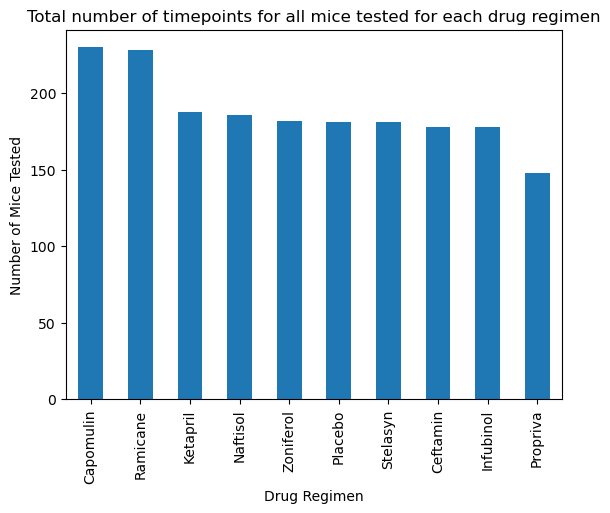

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_count = cleaned_mouse_metadata.groupby("Drug Regimen")["Timepoint"].count()
timepoints_count = timepoints_count.sort_values(ascending=False)
ax = timepoints_count.plot(kind="bar")
ax.set_ylabel("Number of Mice Tested")
ax.set_title("Total number of timepoints for all mice tested for each drug regimen")

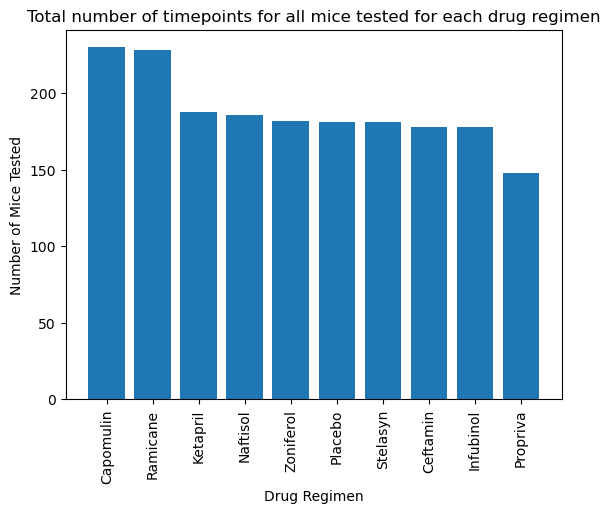

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints_count.index, timepoints_count.values, align = "center")
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()


Text(0, 0.5, 'Sex')

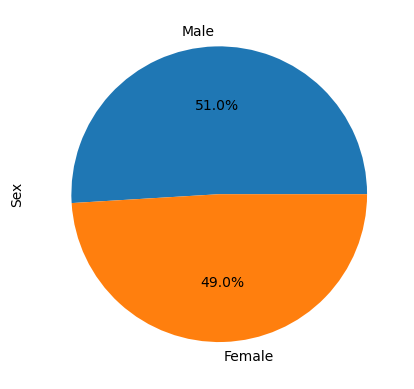

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count = cleaned_mouse_metadata['Sex'].value_counts()
ax = mice_count.plot(kind="pie",autopct='%1.1f%%')
ax.set_ylabel("Sex")

Text(0, 0.5, 'Sex')

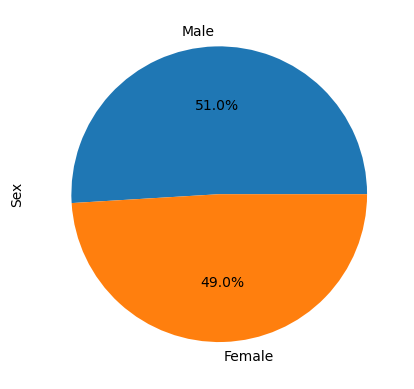

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_count.values
labels = mice_count.index
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_df = cleaned_mouse_metadata[cleaned_mouse_metadata["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = treatment_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, cleaned_mouse_metadata, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_volume_df = final_tumor_volume_df[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment}'s potential outliers: {tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


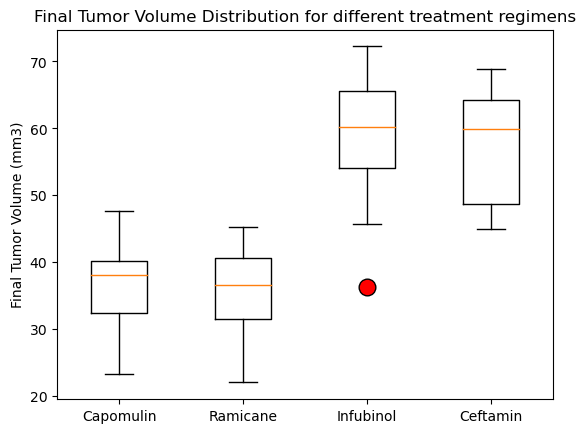

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops = dict(markerfacecolor = 'r', marker = 'o', markersize = 12))
plt.title("Final Tumor Volume Distribution for different treatment regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

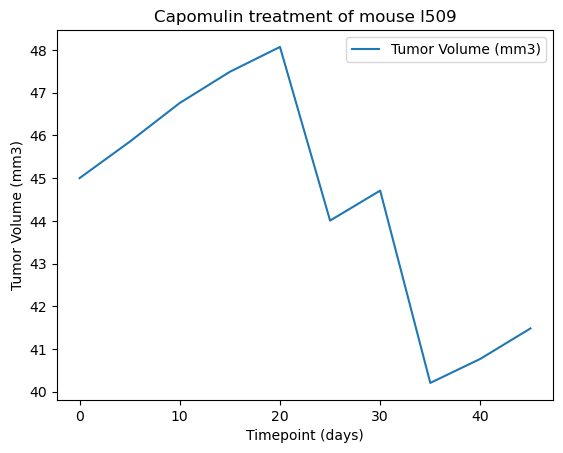

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_mouse_metadata[cleaned_mouse_metadata["Drug Regimen"] == "Capomulin"]

mouse_id = "l509"
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

mouse_df.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line")
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

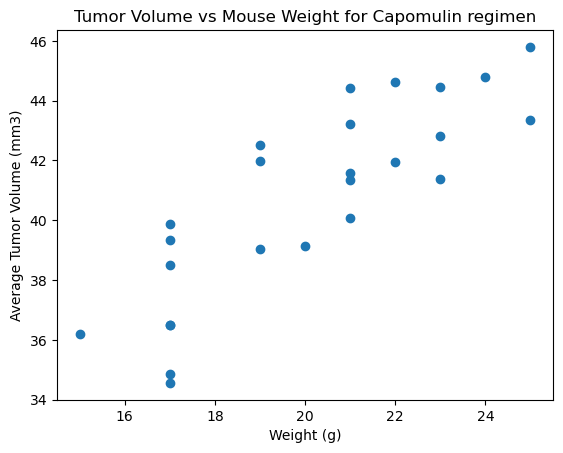

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_mouse_metadata[cleaned_mouse_metadata["Drug Regimen"] == "Capomulin"]

average_df = capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()

plt.scatter(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
plt.title(f'Tumor Volume vs Mouse Weight for Capomulin regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


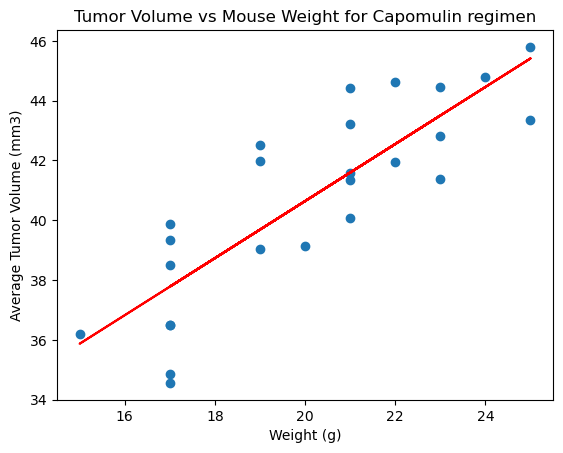

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = average_df["Weight (g)"].corr(average_df["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")

slope, intercept, r_value, p_value, std_err = st.linregress(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])

plt.scatter(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
plt.title(f'Tumor Volume vs Mouse Weight for Capomulin regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(average_df["Weight (g)"], slope*average_df["Weight (g)"]+intercept, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

